In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
day = [1,2,3,4,5,6]

L = [0.044, 0.046, 0.052, 0.045, 0.04, 0.038]
Lp=np.sum(L)/6

logxi = np.array([3.24,4.30,3.70,4.00,4.00,3.70])
err_logxi = np.array([[0.16,0.38,0.15,0.02,0.06,0.36],[0.57,0.22,0.74,0.03,0.06,0.08]])


gamma = np.array([2.04,2.14,2.25,2.2,2.21,2.18])
err_gamma=np.array([[0.09,0.04,0.03,0.01,0.02,0.02],[0.02,0.02,0.04,0.02,0.02,0.01]])

ref=np.array([0.73,0.48,0.81,0.54,0.67,0.62])
err_ref=np.array([[0.18,0.1,0.24,0.07,0.07,0.05],[0.2,0.13,0.26,0.09,0.17,0.1]])


a = np.array([0.78,0.84,0.77,0.86,0.84,0.79])
err_a = np.array([[0.01,0.01,0.01,0.05,0.07,0.08],[0.21,0.15,0.22,0.04,0.07,0.08]])


In [9]:
def err(x,su,sd):
    var_i = (1/4)*(su+sd)**2
    u = np.sum(x)/len(x)
    sigma = np.sqrt(1/len(x)*np.sum((var_i)))
    return(np.array([u,sigma]))

m_logxi = err(logxi,err_logxi[0],err_logxi[1])
m_gamma = err(gamma,err_gamma[0],err_gamma[1])
m_ref = err(ref,err_ref[0],err_ref[1])
m_a = err(a,err_a[0],err_a[1])
m_gamma[1]

0.03162277660168379

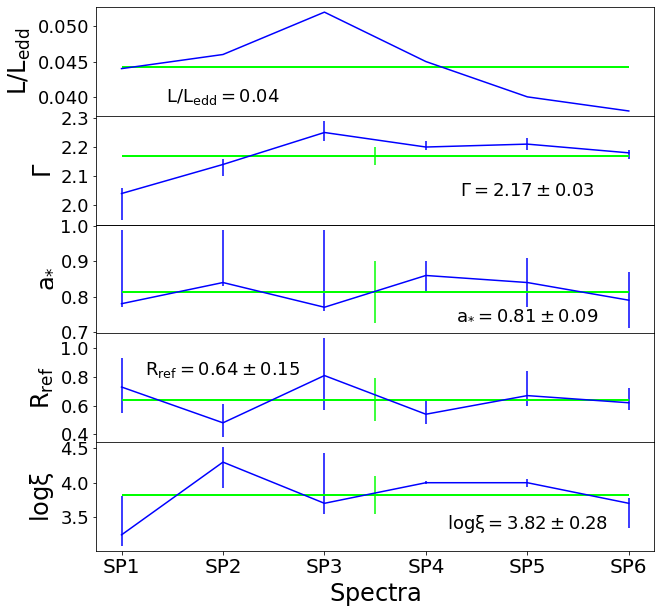

In [18]:
plt.figure(figsize=(10,10)) #table3
ax = plt.subplot(511)
plt.ylabel(r"$\mathrm{L/L_{edd}}$",fontsize=24)
plt.hlines(Lp,1,6,color="lime",linewidth=2)
#plt.ylim(0.036,0.054)
plt.plot(day, L,color="blue")
ax.text(2, 0.04, r"$\mathrm{{L/L_{{edd}}={:.2f}}}$".format(Lp), fontsize=18, color = "k", verticalalignment='center', horizontalalignment='center')
plt.yticks(fontsize=18)

plt.subplots_adjust(hspace=0)

ax = plt.subplot(513)
plt.ylabel(r"$\mathrm{a_{*}}$",fontsize=24)
plt.errorbar(day, a, yerr=err_a,color="blue")
plt.hlines(m_a[0],1,6,color="lime",linewidth=2)
plt.errorbar(3.5, m_a[0], yerr=m_a[1],color="lime")
ax.text(5, 0.75, r"$\mathrm{{a_{{*}}={:.2f}\pm{:.2f}}}$".format(m_a[0],m_a[1]), fontsize=18, color = "k", verticalalignment='center', horizontalalignment='center')
#plt.ylim(-0.2,4.2)
plt.yticks(fontsize=18)

ax = plt.subplot(512)
plt.ylabel(r"$\mathrm{\Gamma}$",fontsize=24)
plt.errorbar(day, gamma, yerr=err_gamma,color="blue")
plt.hlines(m_gamma[0],1,6,color="lime",linewidth=2)
plt.errorbar(3.5, m_gamma[0], yerr=m_gamma[1],color="lime")
ax.text(5, 2.05, r"$\mathrm{{\Gamma}}={:.2f}\pm{:.2f}}}$".format(m_gamma[0],m_gamma[1]), fontsize=18, color = "k", verticalalignment='center', horizontalalignment='center')
plt.xticks([])
plt.yticks(fontsize=18)

ax = plt.subplot(514)
plt.ylabel(r"$\mathrm{R_{ref}}$",fontsize=24)
plt.errorbar(day, ref, yerr=err_ref,color="blue")
plt.hlines(m_ref[0],1,6,color="lime",linewidth=2)
plt.errorbar(3.5, m_ref[0], yerr=m_ref[1],color="lime")
ax.text(2, 0.85, r"$\mathrm{{R_{{ref}}={:.2f}\pm{:.2f}}}$".format(m_ref[0],m_ref[1]), fontsize=18, color = "k", verticalalignment='center', horizontalalignment='center')
plt.yticks(fontsize=18)
#plt.ylim(0.25,0.67)

ax = plt.subplot(515)
plt.ylabel(r"$\mathrm{log\xi}$",fontsize=24)
#plt.ylim(3.7,4.7)
plt.yticks(fontsize=18)
plt.errorbar(day, logxi, yerr=err_logxi,color="blue")
plt.errorbar(3.5, m_logxi[0], yerr=m_logxi[1],color="lime")
plt.hlines(m_logxi[0],1,6,color="lime",linewidth=2)
ax.text(5, 3.4, r"$\mathrm{{log\xi={:.2f}\pm{:.2f}}}$".format(m_logxi[0],m_logxi[1]), fontsize=18, color = "k", verticalalignment='center', horizontalalignment='center')

plt.xlabel(r"$\mathrm{Spectra}$",fontsize=24)
plt.xticks([1,2,3,4,5,6],["SP1","SP2","SP3","SP4","SP5","SP6"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.savefig("table4.png", dpi=200, bbox_inches='tight')

In [5]:
x = np.array([2.47,2.18,2.39,2.53,2.53,3.06,2.62,2.84,2.82,2.55,2.75])
su = np.array([0.1,0.1,0.1,0.13,0.15,0.25,0.2,0.21,0.14,0.19,0.14])
sd = np.array([0.1,0.1,0.1,0.12,0.16,0.27,0.21,0.24,0.15,0.16,0.15])
k = 1/11

var_i = (1/4)*(su+sd)**2

u = np.sum(x)/len(x)

sigma1 = np.sqrt(1/len(x)*np.sum((x-u)**2+var_i))
sigma2 = np.sqrt(1/len(x)*np.sum((var_i)))
sigma3 = np.sqrt(np.sum(var_i/len(x)**2)+np.sum((x-u)**2/len(x)**2))



print(sigma1)
print(sigma2)
print(sigma3)

print(u)

0.2846039004744827
0.1658517958353728
0.08581130470413728
2.612727272727273
